In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

X = iris.data
y = iris.target

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.10)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=.15)
print('X_train', X_train.shape)
print('X_val', X_val.shape)
print('X_test', X_test.shape)

X_train (114, 4)
X_val (21, 4)
X_test (15, 4)


In [13]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(64, ), activation='relu',max_iter=1000, epsilon=1e-08)

In [14]:
from sklearn.metrics import accuracy_score

mlp.fit(X_train, Y_train)
prediksi_val = mlp.predict(X_val)
acc_val = accuracy_score(Y_val, prediksi_val)
print('Akurasi Validasi Training ANN:', acc_val)

Akurasi Validasi Training ANN: 0.9523809523809523


In [15]:
prediksi_test = mlp.predict(X_test)
acc_test = accuracy_score(Y_test, prediksi_test)
print('Akurasi Testing ANN:', acc_test)

Akurasi Testing ANN: 0.9333333333333333


Akurasi Testing ANN: 0.9333333333333333


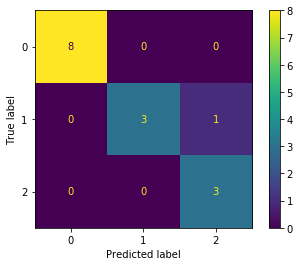

In [16]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix

prediksi = mlp.predict(X_test)
plot_confusion_matrix(mlp, X_test, Y_test)
accuracy = accuracy_score(Y_test, prediksi)
print('Akurasi Testing ANN:', accuracy)

In [17]:
from keras.utils import to_categorical

Y_train = to_categorical(Y_train,3)
Y_val = to_categorical(Y_val,3)
Y_test = to_categorical(Y_test,3)

In [18]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])

In [19]:
model.fit(X_train,Y_train,epochs=100,batch_size=5,validation_data=(X_val,Y_val))

Epoch 1/100
23/23 [==============================] - 0s 6ms/step - loss: 1.6800 - acc: 0.3596 - val_loss: 1.0639 - val_acc: 0.6667
Epoch 2/100
23/23 [==============================] - 0s 1ms/step - loss: 0.9820 - acc: 0.5439 - val_loss: 0.9722 - val_acc: 0.2857
Epoch 3/100
23/23 [==============================] - 0s 1ms/step - loss: 0.8550 - acc: 0.5439 - val_loss: 0.7961 - val_acc: 0.7143
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.7708 - acc: 0.7632 - val_loss: 0.6813 - val_acc: 0.9048
Epoch 5/100
23/23 [==============================] - 0s 1ms/step - loss: 0.6899 - acc: 0.7807 - val_loss: 0.6208 - val_acc: 0.9048
Epoch 6/100
23/23 [==============================] - 0s 1ms/step - loss: 0.6440 - acc: 0.6930 - val_loss: 0.5735 - val_acc: 0.9048
Epoch 7/100
23/23 [==============================] - 0s 1ms/step - loss: 0.5914 - acc: 0.8947 - val_loss: 0.5118 - val_acc: 0.9048
Epoch 8/100
23/23 [==============================] - 0s 1ms/step - loss: 0.5672 - a

23/23 [==============================] - 0s 1ms/step - loss: 0.1207 - acc: 0.9737 - val_loss: 0.0981 - val_acc: 0.9524
Epoch 64/100
23/23 [==============================] - 0s 1ms/step - loss: 0.1175 - acc: 0.9825 - val_loss: 0.0941 - val_acc: 0.9524
Epoch 65/100
23/23 [==============================] - 0s 1ms/step - loss: 0.1188 - acc: 0.9649 - val_loss: 0.0872 - val_acc: 0.9524
Epoch 66/100
23/23 [==============================] - 0s 1ms/step - loss: 0.1255 - acc: 0.9737 - val_loss: 0.0839 - val_acc: 1.0000
Epoch 67/100
23/23 [==============================] - 0s 1ms/step - loss: 0.1236 - acc: 0.9737 - val_loss: 0.0898 - val_acc: 0.9524
Epoch 68/100
23/23 [==============================] - 0s 2ms/step - loss: 0.1071 - acc: 0.9912 - val_loss: 0.0818 - val_acc: 0.9524
Epoch 69/100
23/23 [==============================] - 0s 1ms/step - loss: 0.1080 - acc: 0.9825 - val_loss: 0.0795 - val_acc: 1.0000
Epoch 70/100
23/23 [==============================] - 0s 1ms/step - loss: 0.1078 - acc: 0

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 515
Trainable params: 515
Non-trainable params: 0
_________________________________________________________________


In [28]:
from sklearn.metrics import confusion_matrix

loss, accuracy = model.evaluate(X_test, Y_test)
print('Akurasi Testing ANN:', accuracy)


1/1 [==============================] - 0s 0s/step - loss: 0.1150 - acc: 0.9333
Akurasi Testing ANN: 0.9333333373069763
